In [8]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

dataset  = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

<Axes: >

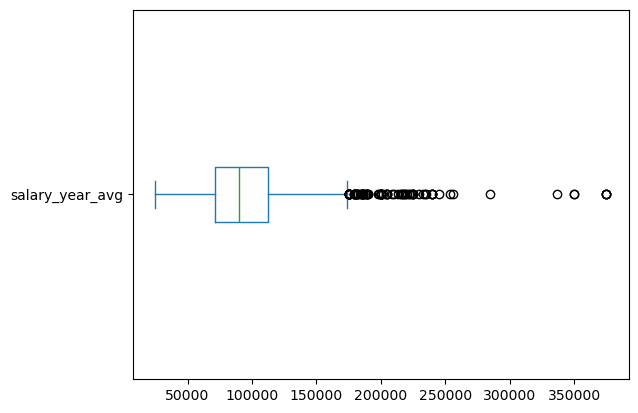

In [14]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29672\3491173588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29672\3491173588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29672\3491173588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29672\3491173588.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=jo

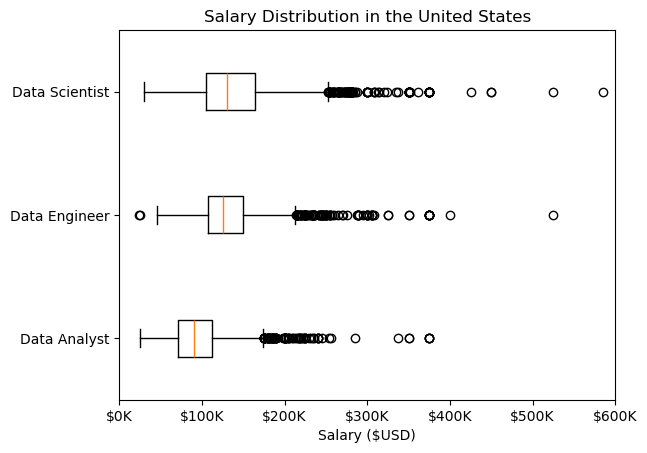

In [26]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Salary ($USD)')
plt.xlim(0, 600000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.show()